<a href="https://colab.research.google.com/github/thallamsaithrishool/ADM_LAB/blob/main/ADM_LAB_10_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [26]:
data=load_breast_cancer()
X=data.data[:,:2]
y=data.target

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [30]:
y_pred = model.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [32]:
print(f"Accuracy:{accuracy}")
print("Confusion Matrix:\n",conf_matrix)
print("Classification Report:\n",report)


Accuracy:0.9035087719298246
Confusion Matrix:
 [[36  7]
 [ 4 67]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87        43
           1       0.91      0.94      0.92        71

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114



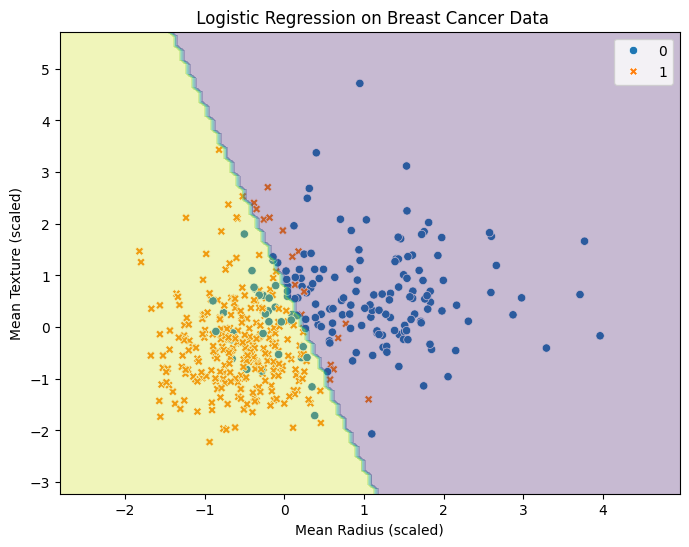

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, style=y_train)
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.xlim(x_min, x_max)
plt.xlabel('Mean Radius (scaled)')
plt.ylabel('Mean Texture (scaled)')
plt.title(' Logistic Regression on Breast Cancer Data')
plt.show()
